In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('train.csv')



In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:

#Val_df.drop(['PassengerId','Name','Parch','Ticket','Cabin'], axis=1)

# will drop rows with one or more NULL values
#df.dropna(axis=0)

#dtrain['Age'].fillna(dtrain['Age'].mean(),inplace =True)
#dtrain.replace({'Sex':{'male':1,'female':0}},inplace=True)
#dtrain.head(5)

In [6]:
# Finding the number of surviving and non-surviving people
df['Survived'].sum()


342

In [7]:
dff = df[['PassengerId', 'Survived','Pclass','Sex','Age','Fare','Embarked']]

In [8]:
dff.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


In [9]:
dff.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
dtype: int64

In [10]:
dff

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S
887,888,1,1,female,19.0,30.0000,S
888,889,0,3,female,NaN,23.4500,S
889,890,1,1,male,26.0,30.0000,C


In [11]:
df_gr = dff.groupby("Sex")

df_male = df_gr.get_group('male') 

In [12]:
df_male.head(6)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
4,5,0,3,male,35.0,8.0500,S
5,6,0,3,male,NaN,8.4583,Q
6,7,0,1,male,54.0,51.8625,S
7,8,0,3,male,2.0,21.0750,S
12,13,0,3,male,20.0,8.0500,S


In [13]:
# Extracting all rows with "0", and "1" wrt Survived coloumn

dff_Suviv= dff[(dff.Survived == 1)]

dff_Dead= dff[(dff.Survived == 0)]

In [14]:

dff_Dead['Survived'].sum()

0

In [15]:
dff_Dead.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
4,5,0,3,male,35.0,8.0500,S
5,6,0,3,male,NaN,8.4583,Q
6,7,0,1,male,54.0,51.8625,S
7,8,0,3,male,2.0,21.0750,S


(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

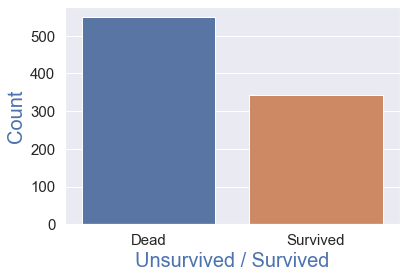

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Survived", data=dff)

ax.set_xticklabels(['Dead','Survived'])

plt.xlabel('Unsurvived / Survived',fontsize=20,color='b')
plt.ylabel('Count',fontsize=20,color='b')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [17]:

# Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.


#To indicate passangers in First Class 
dff_Suviv_Pclass= dff[(dff.Pclass == 1)]

#Total count of passangers in First Class
Total_FistClass_count=dff_Suviv_Pclass['Pclass'].value_counts()

#Total count of passangers in First Class that survived
Total_Suviv_Pclass= dff_Suviv_Pclass[(dff_Suviv_Pclass.Survived == 1)]

Total_Surviv_FistClass_count=Total_Suviv_Pclass['Survived'].value_counts()



In [18]:
Total_Suviv_Pclass.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
1,2,1,1,female,38.0,71.2833,C
3,4,1,1,female,35.0,53.1000,S
11,12,1,1,female,58.0,26.5500,S


In [19]:
# Proportion of surviving 1st class passengers
Proportion=Total_Surviv_FistClass_count / Total_FistClass_count

In [20]:
Proportion

1    0.62963
dtype: float64

In [21]:
# Short way
Prop2=dff[dff['Pclass']==1]['Survived'].value_counts(normalize=True)[1]

In [22]:
# To know the unique values in Pclass
dff.Pclass.unique()

array([3, 1, 2], dtype=int64)

# Bar plot for male/female passengers and 1st/2nd/3rd class passengers.

C:\Users\seun\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


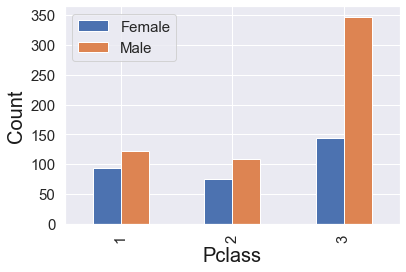

In [23]:
#Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

# First indicate male passangers with 1, and female passangers with 0 

dff.replace({'Sex':{'male':1,'female':0}},inplace=True)

dff.head(4)

df_group = dff.groupby(['Pclass','Sex'])['Sex'].count()
df_group.unstack().plot(kind='bar')

plt.xlabel('Pclass',fontsize=20,color='k')
plt.ylabel('Count',fontsize=20,color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(['Female', 'Male'],fontsize=15)

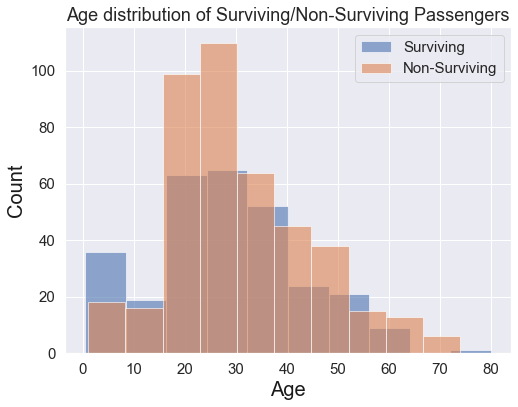

In [24]:
# Histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.


plt.figure(figsize=(8,6))
plt.hist(dff['Age'][dff['Survived']==1],alpha=0.6)
plt.hist(dff['Age'][dff['Survived']==0],alpha=0.6)
plt.xlabel('Age',fontsize=20,color='k')
plt.ylabel('Count',fontsize=20,color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Age distribution of Surviving/Non-Surviving Passengers",fontsize=18)

plt.legend(['Surviving', 'Non-Surviving'],fontsize=15)


# Computing the average age for the survived & drowned passengers 

In [25]:
dff.replace({'Sex':{'male':1,'female':0}},inplace=True)


C:\Users\seun\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [26]:
# Calculate the average age for survived .

dff_All_Suviv= dff[(dff.Survived == 1)]
dff_All_Suviv.head(4)

Ave_dff_Suviv=dff_All_Suviv['Age'].mean()


In [27]:
# Calculate the average age for drowned passengers (Dead).

dff_All_Drowned= dff[(dff.Survived == 0)]
dff_All_Drowned.head(4)

Ave_dff_Drowned=dff_All_Drowned['Age'].mean()

In [28]:
print (Ave_dff_Suviv)
print (Ave_dff_Drowned)

28.343689655172415
30.62617924528302


In [29]:
# Replace missing age values having NaN with the mean age.

dff['Age'].fillna(dff['Age'].mean(),inplace =True)

C:\Users\seun\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [30]:
dff.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,S
1,2,1,1,0,38.0,71.2833,C
2,3,1,3,0,26.0,7.9250,S


In [31]:
# Table for counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

print(pd.pivot_table(dff, index = 'Survived', columns = 'Pclass',values = 'PassengerId', aggfunc ='count'))
print()


print(pd.pivot_table(dff, index = 'Survived', columns = 'Sex',values = 'PassengerId', aggfunc ='count'))
print()

print(pd.pivot_table(dff, index = 'Survived', columns = 'Embarked',values = 'PassengerId', aggfunc ='count'))
print()


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex         0    1
Survived          
0          81  468
1         233  109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [32]:
dff.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,S
1,2,1,1,0,38.0,71.2833,C
2,3,1,3,0,26.0,7.9250,S


## Exploratory Data Analysis (EDA)

In [33]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [34]:
dtrain = df[['PassengerId', 'Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']]

dtrain.head(5)
dtrain.shape

(891, 10)

In [35]:
dtrain['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

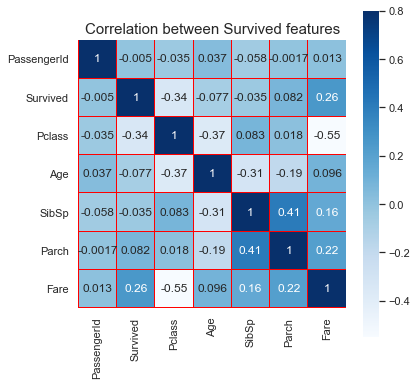

In [36]:
# Correlation matrix

dt_Corr = df[['PassengerId', 'Survived','Pclass','Age','SibSp','Parch','Fare']]

dt_Cor=dt_Corr .corr(method ='pearson')

#dt_Cor.style.background_gradient(cmap='red').set_precision(2)

plt.figure(figsize=(6, 6))
sns.heatmap(dt_Cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Blues',linecolor="red")

plt.title('Correlation between Survived features',fontsize=15);

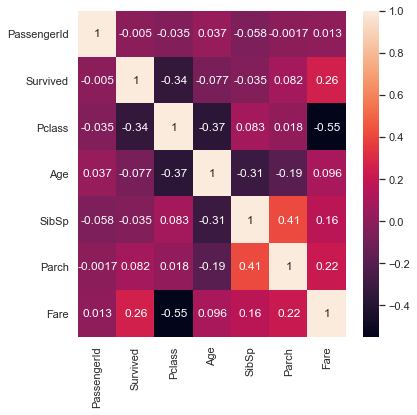

In [37]:
# Correlation matrix using heat map

CorrMatrix = dt_Corr.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(CorrMatrix, annot=True)
plt.show()

In [38]:
dtrain.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
# dtrain.replace({'Embarked':{'S':1,'C':2,'Q':3,'nan':4}},inplace=True)

In [40]:
# To create a ColumnTransformer
# First, check for the sum of the missing values for every column




In [41]:
# dtrain['Embarked'].dropna(inplace=True,axis=0)

#dtrain['Age'].fillna(dtrain['Age'].mean(),inplace =True)

# Build a Logistic Regression model

In [42]:
dtrain=pd.read_csv('train.csv')

X = dtrain[["Pclass","Sex","Age"]]
y = dtrain["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((668, 3), (223, 3), (668,), (223,))

In [43]:
dtrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
dtrain['Age'].fillna(dtrain['Age'].mean(),inplace =True)

dtrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
# Applying Feature Engineering on the Sex column

transformation = ColumnTransformer(
    [
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False), ["Sex"]),
    ]
)


In [46]:
# Transformation of the X_train data and Fit

X_train_Fe = transformation.fit_transform(X_train)

In [47]:
# Transformation of the X_test data

X_test_Fe = transformation.transform(X_test)

In [48]:
X_test_Fe

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

# Initiate the model

In [49]:
model = LogisticRegression()

model.fit(X_train_Fe, y_train)



LogisticRegression()

In [50]:
# Show the coefficients calculated by the model.

model.coef_, model.intercept_

(array([[ 1.23406955, -1.23406551]]), array([-0.20379425]))

In [51]:
# Checking the accuracy of the model

model.predict_proba(X_test_Fe)

array([[0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.26303073, 0.73696927],
       [0.26303073, 0.73696927],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.

# Testing for overfitting or Underfitting (i.e:Evaluate the model)



In [52]:
# train accuracy

from sklearn.metrics import accuracy_score

model.score(X_train_Fe, y_train)

0.7874251497005988

In [53]:
model.score(X_test_Fe, y_test)

0.7847533632286996

# To predict y values (i.e.Survived-Ypred; Alive-1,Dead-0)

In [54]:
Ypred = model.predict(X_test_Fe) 
Ypred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [55]:
# another way of computing accuracy for the test data 
accuracy_score(y_test,Ypred)

0.7847533632286996

# Precision vs recall

In [56]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test,Ypred)
recall = recall_score(y_test,Ypred)
print(precision_score(y_test,Ypred), recall_score(y_test,Ypred))

0.7411764705882353 0.7078651685393258


# Now make predictions with the developed model on the test data

In [57]:
# Run the same procedure above again on test.csv file. Never fit your test.csv file

df_test = pd.read_csv('test.csv')
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
df_Test = df_test[["Pclass", "Sex","Age"]]
df_Test.head()

,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0


In [59]:
# Applying Feature Engineering. Using the function "transformation" defined above

X_TEST_FE = transformation.transform(df_Test)
X_TEST_FE

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [60]:
m_LogReg = LogisticRegression()
m_LogReg.fit(X_train_Fe, y_train)

#log_reg = LogisticRegression()
#log_reg.fit(X_train, y_train)
#y_pred = log_reg.predict(X_test)
#y_pred

LogisticRegression()

In [61]:
predictions = m_LogReg.predict(X_TEST_FE)
predictions



array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [63]:
predictions.shape

(418,)

# Confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test,Ypred)
conf


array([[112,  22],
       [ 26,  63]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

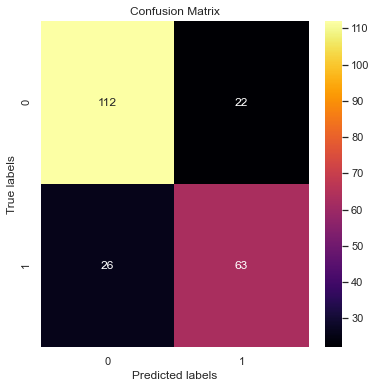

In [65]:
#plot the heatmap
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, fmt='g', cmap = 'inferno')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [69]:
pd.DataFrame(data=predictions, index=df_test['PassengerId'], columns=['Survived']).to_csv('kaggle_submission.csv')

# Add more features into the model to a obtain better accuracy

In [103]:
X = dtrain[["Pclass","Sex", "Age", "Fare", "Embarked"]]
y = dtrain["Survived"]



In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 5), (223, 5), (668,), (223,))

# Applying Feature Engineering

In [ ]:
#trans = ColumnTransformer([
## missing values
    #('missing_embarked', SimpleImputer(strategy='most_frequent'), ['Embarked']),
    #('missing_cabin', SimpleImputer(strategy='most_frequent'), ['Cabin']),
   # ('missing_age', SimpleImputer(strategy='mean'), ['Age']),
    #('transform Age column',Age_pipeline,['Age']),
    #("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False), ["Pclass","Sex","SibSp", "Parch", "Ticket", "Embarked"]),
  #  ("scaler", StandardScaler(), ["Age","Fare"])
#])

In [113]:
#Pipelines

pipeline_age = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]
)

In [117]:
# Transformers


final_transformation = ColumnTransformer(
    [
        ("transform twice Age-col2", pipeline_age, ["Age"]),
        ("encoder2", OneHotEncoder(handle_unknown="ignore", sparse=False), ["Sex"]),
        ("encoder3", OneHotEncoder(handle_unknown="ignore", sparse=False), ["Embarked"]),
        ("scaler2", StandardScaler(), ['Fare']),
        ("scaler3", StandardScaler(), ['Pclass']),
        
    ]
)



In [118]:
X_train_FE = final_transformation.fit_transform(X_train)

In [119]:
X_test_FE = final_transformation.transform(X_test)


In [120]:
final_transformation.transform(X_test)

array([[ 0.0171447 ,  0.        ,  1.        , ...,  0.        ,
        -0.32839086,  0.80934914],
       [ 0.11721087,  0.        ,  1.        , ...,  0.        ,
        -0.42042549, -0.40558395],
       [-0.72892862,  0.        ,  1.        , ...,  0.        ,
        -0.4703621 ,  0.80934914],
       ...,
       [ 0.0171447 ,  0.        ,  1.        , ...,  0.        ,
        -0.47092837,  0.80934914],
       [-0.42124153,  1.        ,  0.        , ...,  0.        ,
        -0.37194334, -0.40558395],
       [-0.88277216,  0.        ,  1.        , ...,  0.        ,
        -0.23207234,  0.80934914]])

In [121]:
model.fit(X_train_FE, y_train)

LogisticRegression()

In [122]:

model.predict_proba(X_test_FE)

array([[0.856575  , 0.143425  ],
       [0.79763858, 0.20236142],
       [0.8890378 , 0.1109622 ],
       [0.13625891, 0.86374109],
       [0.24128776, 0.75871224],
       [0.08796756, 0.91203244],
       [0.36438105, 0.63561895],
       [0.87645445, 0.12354555],
       [0.28017503, 0.71982497],
       [0.07644991, 0.92355009],
       [0.61932649, 0.38067351],
       [0.94042993, 0.05957007],
       [0.46197796, 0.53802204],
       [0.85845239, 0.14154761],
       [0.81917716, 0.18082284],
       [0.06994059, 0.93005941],
       [0.65214436, 0.34785564],
       [0.36436536, 0.63563464],
       [0.77840661, 0.22159339],
       [0.68358004, 0.31641996],
       [0.89971229, 0.10028771],
       [0.60458581, 0.39541419],
       [0.3918082 , 0.6081918 ],
       [0.88892805, 0.11107195],
       [0.91289156, 0.08710844],
       [0.85584755, 0.14415245],
       [0.50787377, 0.49212623],
       [0.79729316, 0.20270684],
       [0.83363836, 0.16636164],
       [0.47488427, 0.52511573],
       [0.

In [123]:
# Calculate the train accuracy

model.score(X_train_FE, y_train)

0.7949101796407185

In [124]:
# Calculate the validation accuracy

model.score(X_test_FE, y_test)

0.7847533632286996

In [125]:
YPred = model.predict(X_test_FE)
YPred


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [126]:
accuracy_score(y_test, YPred)

0.7847533632286996

In [ ]:
# We can conviniently say there is no overfitting here since our train and test data values are very close

#  Random Forest 
   (Excluding categorical variables)




In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X = dtrain[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = dtrain["Survived"]

train, test = train_test_split(dtrain)


Xtrain = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
ytrain = train['Survived']


rf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf.fit(Xtrain, ytrain)

importance=rf.feature_importances_


list(zip(importance, Xtrain.columns))

[(0.13299140119472214, 'Pclass'),
 (0.18369065460776549, 'Age'),
 (0.08387410051571459, 'SibSp'),
 (0.08739828108576707, 'Parch'),
 (0.5120455625960307, 'Fare')]

# Random Forest

(With transformed categorical variables)




In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df["Survived"]

train, test = train_test_split(df)


Xtrain = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
ytrain = train['Survived']

Xtest = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
ytest = test['Survived']

# Transform categorical variables into numeric ones


final_transformation = ColumnTransformer(
    [
        ("transform twice Age-col3", pipeline_age, ["Age"]),
        ("encoder5", OneHotEncoder(handle_unknown="ignore", sparse=False), ["Sex"]),
        ("encoder6", OneHotEncoder(handle_unknown="ignore", sparse=False), ["Embarked"]),
        ("scaler3", StandardScaler(), ['Fare']),
                
    ]
)


X_train_FE = final_transformation.fit_transform(Xtrain)

X_test_FE = final_transformation.transform(Xtest)

rf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf.fit(X_train_FE, ytrain)

importance=rf.feature_importances_


list(zip(importance, Xtrain.columns))




[(0.0896461497247775, 'Pclass'),
 (0.16022611452034935, 'Sex'),
 (0.4389839372131699, 'Age'),
 (0.12568263460847054, 'SibSp'),
 (0.02128191667770394, 'Parch'),
 (0.03093412273948513, 'Fare'),
 (0.01511801287537769, 'Embarked')]

In [130]:
rf.score(X_train_FE, ytrain)


0.7934131736526946

In [131]:
rf.score(X_test_FE, ytest)

0.7802690582959642